In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'/content/IEA Global EV Data 2024.csv')

In [5]:
data.head(10)


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [6]:
data.size

101232

In [8]:
modes = data['mode'].value_counts()
modes

,count
mode,
Cars,4706
Buses,2696
Vans,2568
Trucks,1766
EV,918


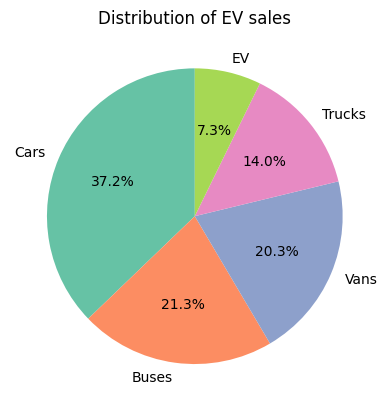

In [9]:
fig, ax = plt.subplots()
ax.pie(modes, labels = modes.index, startangle = 90, autopct='%0.1f%%', colors = plt.cm.Set2.colors)
ax.set_title('Distribution of EV sales');

In [15]:
vehicles = data.loc[data['unit'] == 'Vehicles']
vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [17]:
vehicles_by_countries = pd.DataFrame(vehicles.groupby(vehicles['region'])['value'].sum())
vehicles_by_countries.reset_index(inplace = True)
vehicles_by_countries.head(10)

,region,value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


In [18]:
vehicles_by_countries.columns = ['region', 'total_value']
vehicles_by_countries = vehicles_by_countries[vehicles_by_countries['region'] != 'World']
vehicles_by_countries

,region,total_value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


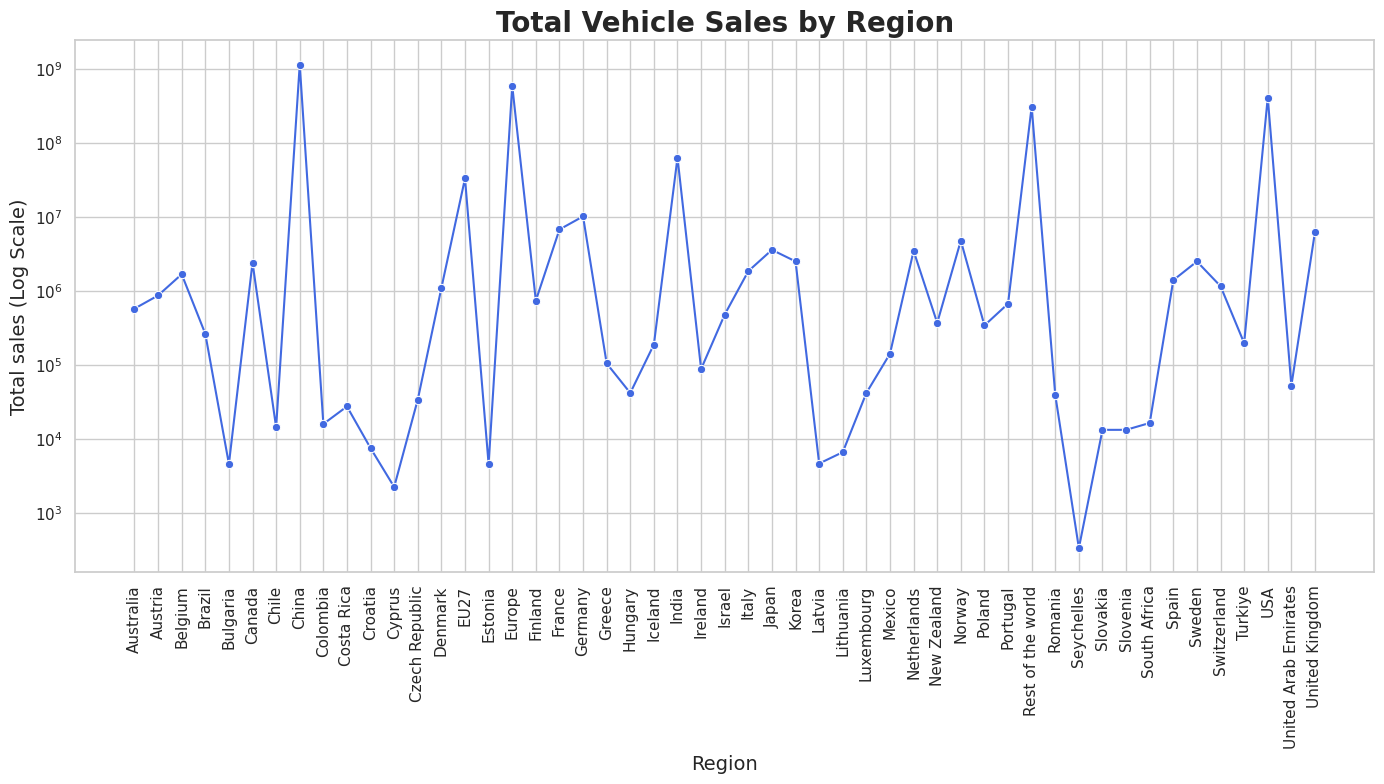

In [19]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.lineplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], marker = 'o', color = 'royalblue')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();